<a href="https://colab.research.google.com/github/calosos/py_resumenes_codigos/blob/main/C5_B_Distribuciones_muestrales_tecnicas_de_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Bootsrap


##Muestreo aleatorio o randomizado.

Muestreo Aleatorio o Randomizado, es una forma en la que se puede evitar los sesgos a la hora de tomar muestras, esto es crear una muestra  a partir de una población seleccionando elementos del conjunto original aleatoriamente.Cada elemento debe terner las mismas probabilidad de ser elgigo para la muestra, salvo que haya algún motivo para hacerlo de otra manera.
Se evita el riesgo de seleccipon

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto diabetes-clean.csv', index_col = 0)
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Ejemplo en la variable 'glucose'
Un muestro aleatorio puede tomarse sin reposición , significa que cada vez que un elemento se toma de la muestra original, no se regresa a la muestra original. Con cada muestreo, entonces, nuestra muestra original se hace más pequeña, lo cual cambia las posibilidadesd de elegir las muestras restantes.

In [4]:
df['glucose'].sample(n=20, replace = False)

121    111
19     115
695    142
401    137
50     103
369    133
613    105
289    108
287    119
485    135
374    122
554     84
102    125
195    158
616    117
687    107
515    163
672     68
113     76
594    123
Name: glucose, dtype: int64

Tambíen podemos tomar elementos con reposición, donde regresamos cada elemento después de tomar la muestra. Esto quiere decir que en cada toma tenemos la misma probabilidad de elegir cualquiera de los elementos y además el remuestreo puede incluir elementos repetidos:

In [5]:
df['glucose'].sample(frac=0.10, replace = True)

322    124
107    144
333    106
586    143
323    152
      ... 
637     94
398     82
336    117
52      88
738     99
Name: glucose, Length: 77, dtype: int64

##El Bootstrap 
 EL Bootsrap nos sirve para generar lo que se llaman distribuciones muestrales de estadísticas. Esto es un histograma de una medida estadística cuantificada utilizando un gran número de remuestreos. ¿Para qué queremos hacer esto? Para calcular la incertidumbre de nuestra medida estadística. Dado que no podemos regresar a la fuente original, vamos a crear 'nuevas muestras' a partir de la que tenemos, con el fin de simular qué pasaría si regresáramos a la fuente original a tomar más muestras. El algoritmo es el siguiente:

Toma un elemento de tu conjunto de datos de manera aleatoria con reposición.
Repite el paso 1 n veces (entre más grande tu n, más preciso tu cálculo; pero no tiene sentido que sea tan grande como el tamaño de tu muestra).
Toma la medida estadística que te interese de tus valores remuestreados.
Repite los pasos 1 a 3 R veces (entre mayor sea R, más preciso tu cálculo).
Utiliza las medidas obtenidas para: a) Generar un histograma o boxplot b) Calcular el error estándar c) Calcular un intervalo de confianza
Nuestro cálculo va a resultar más exacto si n y R son lo más grandes posibles. Pero el boostrapping es un proceso que toma mucho tiempo y poder computacional, así que si nuestro dataset es muy grande habrá que disminuir estos valores hasta que el procedimiento completo tome una cantidad decente de tiempo.

Vamos a realizar estos pasos y llevar a cabo el inciso a del paso 5:

In [6]:
glucose = df['glucose']

means = []

for i in range(100_000): ##Que es 
    sample = glucose.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


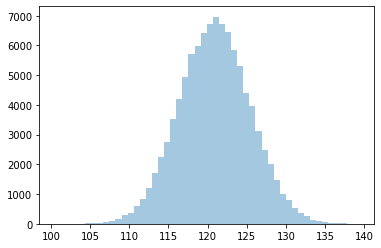

In [7]:
sns.distplot(serie_means, kde=False, norm_hist=False);

##c) Teorema del límite centra
Existe un teorema matemático llamado Teorema del Limíte Central que establece que las distribuciones muestrales de estadísticas van a tender hacia la normalidad. Ésta no es una regla absoluta, pero se cumple en muchos casos. En nuestro ejemplo podemos calcular qué tan cerca de la normalidad están nuestros promedios muestrales:



In [8]:
serie_means.skew()

0.018337252037642082

In [9]:
serie_means.kurtosis()

0.019959879745358844

Como puedes ver, en este caso se cumple con mucha precisión. Entre más pequeñas sean nuestras remuestras, normalmente la curtosis aumenta.

Vamos a preguntarnos:

¿Por qué creen que la curtosis aumente si nuestras remuestras son más pequeñas?
¿Por qué la teoría del límite central suele cumplirse?
¿Qué significa que la distribución muestral de una medida estadística no sea normal? ¿Cómo podemos interpretar ese fenómeno?

#Error estandar e intervalo de confianza 

##Error estándar

Recordarás que la desviación estándar es una medida de dispersión de nuestros datos. Bueno, pues el error estándar es la desviación estándar de nuestra serie de medidas estadísticas:

In [10]:
print(f'Error estandar: {serie_means.std()}')

Error estandar: 4.521514202261452


In [11]:
print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')

Valor mínimo: 100.46
Valor máximo: 139.3
Rango: 38.84000000000002


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


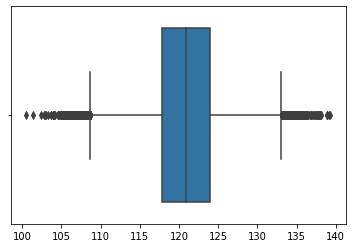

In [12]:
sns.boxplot(serie_means);


Vamos a preguntarnos:

¿Cómo podemos interpretar la desviación estándar? ¿Qué implica una mayor o menor desviación estándar?
¿Por qué necesitamos saber el rango de nuestros datos para interpretar correctamente la desviación estándar?
¿En este caso específico qué significa la desviación estándar que obtuvimos?

##Intervalos de Confianza

Los intervalos de confianza son una manera de cuantificar la incertidumbre que existe en nuestra medida estadística. Si pudiéramos regresar a nuesta fuente original a tomar más muestras, el intervalo de confianza sería el intervalo numérico en el cual podemos asegurar con cierto nivel de seguridad que caería nuestra nueva medición estadística.

Para obtener un intervalo de 95% de confianza, por ejemplo, tenemos que tomar nuestro histograma, removerle 2.5% de valores al principio y al final, y obtener los nuevos valores mínimo y máximo. De esta manera el 95% de los valores originales quedan dentro de este nuevo intervalo.

Podemos obtener nuestro intervalo de confianza utilizando cuantiles:

In [13]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)

Podemos escribir nuestro intervalo de confianza de dos maneras distintas:



In [14]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {glucose.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 112.1 < 120.89453125 < 129.82


In [15]:
mean_of_intervals = ((glucose.mean() - limite_inferior) + (limite_superior - glucose.mean())) / 2

print(f'Intervalo de 95% confianza de la media: {glucose.mean()} +/- {mean_of_intervals}')

Intervalo de 95% confianza de la media: 120.89453125 +/- 8.86


Podemos visualizar estos límites también

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


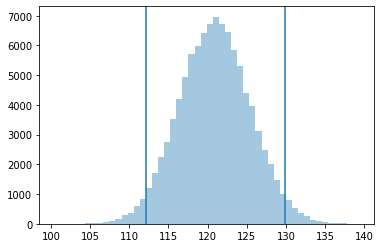

In [16]:
sns.distplot(serie_means, kde=False, norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);

#Dataset de entrenamiento y de prueba

##REgresión Lineal Multiple

Vamos a combinar esta técnica con un modelo de Regresión Linear Múltiple. La Regresión Linear Múltiple es básicamente lo mismo que la Regresión Linear Simple, con la diferencia de que podemos utilizar más de una variable independiente y dependiente. Es más difícil (y a veces en realidad imposible) visualizar la función lineal que obtenemos a través de una Regresión Linear Múltiple, puesto que la línea que representa es una línea que se encuentra en ¡más de dos dimensiones! Pero el concepto es el mismo: utilizamos una o más variables independientes para entrenar un modelo, con el objetivo de encontrar una función lineal que pueda predecir a una o más variables dependientes.

Por suerte, el proceso de entrenamiento es en realidad el mismo, así que podemos concentrarnos en aprender a dividir nuestro dataset en entrenamiento y prueba. 

In [17]:
df.isna().sum()

pregnancies                   0
glucose                       0
blood_pressure                0
skin_thickness                0
insulin                       0
bmi                           0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64

In [19]:
df = df.drop(columns=['outcome'])

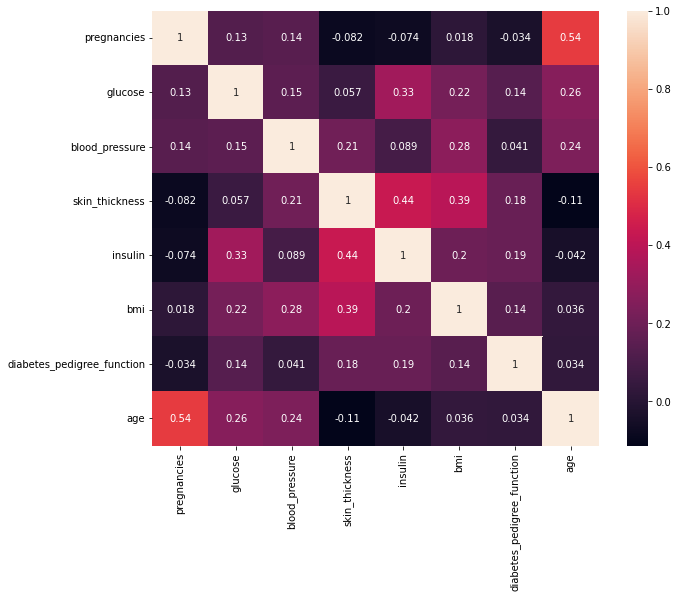

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

Ahora vamos a utilizar este método de scikit learn para dividir nuestro dataset en dos. Voy a entrenar un modelo para intentar predecir los niveles de insulina en una persona utilizando las variables 'glucose' y 'skin_thickness', así que mi variable dependiente será 'glucose' y mis variables independientes serán las otras dos.

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
X= df[['glucose', 'skin_thickness']]
y= df['insulin']

In [28]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

Nota el tamaño del dataset de prueba (30% del total) y que estamos revolviendo el dataset aleatoriamente antes de realizar la división.

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()
lr.fit(X_training, y_training)

LinearRegression()

In [31]:
lr.score(X_test, y_test)

0.3723926699378143

Como puedes ver, nuestro R2 es menor incluso que los coeficientes de correlación que tienen ambas variables independientes con la dependiente. Esto significa que nuestra precisión no es necesariamente 'acumulativa'.

Mira lo que sucede si entrenamos nuestro modelo sin hacer la división de entrenamiento y prueba:

In [32]:
lr_2 = LinearRegression()
lr_2.fit(X, y)

LinearRegression()

In [33]:
lr_2.score(X, y)

0.28491868235030937

Obtenemos un score ligeramente mejor. Aunque en este caso no resulta tan relevante porque de todas maneras el poder predictivo es prácticamente nulo, nos demuestra que el modelo puede a veces aprender a predecir correctamente los datos que conoce y generalizar muy mal a datos que no conoce.

# Validación cruzada

Validación Cruzada de K-Iteraciones
Hay muchas maneras de aplicar esta técnica. El algoritmo que vamos a aprender hoy se llama Validación Cruzada de K-Iteraciones. Consta de los siguientes pasos:

Tomamos nuestro dataset y lo revolvemos aleatoriamente.

Decidimos un número K que va a ser el número de subdivisiones en el que vamos a dividir a nuestro dataset.

Para el primer entrenamiento, dejamos fuera la primera sección. Entrenamos usando la secciones restantes, probamos el modelo entrenado con la primera sección y evaluamos su desempeño.

Volvemos a entrenar nuestro modelo, pero esta vez dejando fuera la segunda sección como dataset prueba. Entrenamos, probamos con la segunda sección y evaluamos el desempeño del modelo.

Repetimos el proceso K veces. En cada iteración dejamos la sección siguiente como dataset de prueba.

Tomamos todas las evaluaciones de los K entrenamientos (que en el caso de una Regresión Lineal Múltiple podrían ser coeficientes de determinación) y sacamos el promedio y la desviación estándar. Esto servirá como una medida del "valor típico" de desempeño y la incertidumbre que tiene nuestro modelo.

In [34]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression


In [35]:
lr = LinearRegression()

In [36]:
scores = cross_validate(lr, X, y, scoring='r2')

In [37]:
scores

{'fit_time': array([0.00799346, 0.00406599, 0.00375819, 0.0036037 , 0.00353146]),
 'score_time': array([0.00281501, 0.00296688, 0.00818014, 0.00266814, 0.00248361]),
 'test_score': array([0.36309888, 0.26517203, 0.29784786, 0.16315445, 0.26375667])}

Obtenemos la evaluación del modelo usando el promedio y la desviación estándar de los scores obtenidos:



In [38]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.271 +/- 0.065
